In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 11.6 MB/s eta 0:00:00


In [ ]:
import transformers
from transformers import BertTokenizer, BertForSequenceClassification

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

In [ ]:
# Load the libaries dataset
# When you load the datasets, please select both training and testing files at "Choose Files" and click "Open"
# You could add other necessary libraries here
import pandas as pd
import numpy as np
from google.colab import files

from sklearn.metrics import accuracy_score
# If you would like to delete the files uploaded, go to Runtime --> Factory reset runtime
uploaded = files.upload()

Saving final_prj_dataset.csv to final_prj_dataset.csv


In [ ]:
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#library that contains punctuation
import string
string.punctuation

from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
earnings = pd.read_csv('final_prj_dataset.csv')
earnings.head()

,sentiment,text
0,positive,Revenue for the quarter landed within our guid...
1,positive,Highest quarterly revenue in Co.'s history.\nE...
2,positive,Achieved double-digit growth in:\nGrowth rates...
3,positive,"Biggest year ever in most parts of world, with..."
4,negative,"In 2015, notwithstanding a difficult PC market..."


#### Text Preprocessing (for visualizations)

In [ ]:
# text_preprocessing, removes stopwords
stop_words = stopwords.words('english')
visual_df = earnings.copy()
visual_df['text'] = visual_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))

# remove unnecessary punctuation
def remove_punctuation(text):
    if type(text)==float:
        return text
    new_text = ""  
    for i in text:
        if i not in string.punctuation:
            new_text+=i    
    return new_text

visual_df['text'] = visual_df['text'].apply(lambda x: remove_punctuation(x))

#### N-Grams Model Visualization


In [ ]:
#n_grams_df = earnings[['text', 'sentiment']].copy()

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in stop_words]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

visual_df['one-grams'] = visual_df['text'].apply(lambda x: generate_ngrams(x))
visual_df['bigrams'] = visual_df['text'].apply(lambda x: generate_ngrams(x, 2))
visual_df['trigrams'] = visual_df['text'].apply(lambda x: generate_ngrams(x, 3))

In [ ]:
from collections import defaultdict
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py


train0_df = visual_df[visual_df["sentiment"]=="neutral"]
train1_df = visual_df[visual_df["sentiment"]=="positive"]
train2_df = visual_df[visual_df["sentiment"]=="negative"]

## custom function for ngram generation ##
## can n-grams be used for feature generation 
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in stop_words]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# bar chart of neutral sentiment earnings
freq_dict = defaultdict(int)
for sent in train0_df["text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# bar chart of positive sentiment earnings
freq_dict = defaultdict(int)
for sent in train1_df["text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# bar chart of negative sentiment earnings
freq_dict = defaultdict(int)
for sent in train2_df["text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating three subplots
fig = tools.make_subplots(rows=1, cols=3, vertical_spacing=0.04,
                          subplot_titles=["Frequent words-neutral earnings",
                                          "Frequent words-positive earnings", 
                                          "Frequent words-negative earnings"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)

fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Generate Word Visualizations

In [ ]:
# separate dataset based on the sentiment column
neutral_df = visual_df[visual_df["sentiment"]=="neutral"]
positive_df = visual_df[visual_df["sentiment"]=="positive"]
negative_df = visual_df[visual_df["sentiment"]=="negative"]

def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
neutral_text = neutral_df.text.values
positive_text = positive_df.text.values
negative_text = negative_df.text.values

In [ ]:
generate_word_cloud(neutral_text)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
generate_word_cloud(positive_text)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
generate_word_cloud(negative_text)

Output hidden; open in https://colab.research.google.com to view.

#### Data Distribution for Sentiment Values

In [ ]:
sentiment_counts = earnings['sentiment'].value_counts()
print(sentiment_counts)

neutral     2879
positive    1383
negative     621
Name: sentiment, dtype: int64


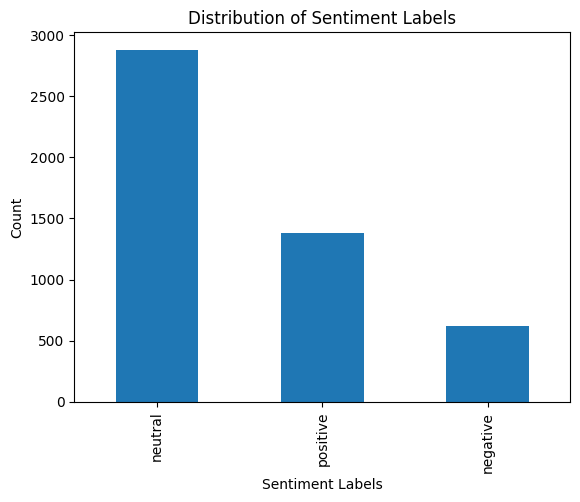

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.show()

#### Handle Class Imbalance by Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Separate the features and the target variable
X = earnings.drop(columns=['sentiment'])
y = earnings[['sentiment']]

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Undersample the majority class
X_resampled, y_resampled = rus.fit_resample(X, y)


#### Model Performance Before Undersampling

In [ ]:
import torch

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")


In [ ]:
earnings

,sentiment,text
0,positive,Revenue for the quarter landed within our guid...
1,positive,Highest quarterly revenue in Co.'s history.\nE...
2,positive,Achieved double-digit growth in:\nGrowth rates...
3,positive,"Biggest year ever in most parts of world, with..."
4,negative,"In 2015, notwithstanding a difficult PC market..."
...,...,...
4878,negative,LONDON MarketWatch -- Share prices ended lower...
4879,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4880,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4881,negative,Net sales of the Paper segment decreased to EU...


Preprocess data

In [ ]:
X = earnings['text']
y = earnings['sentiment']

# Convert the labels to numerical values
label_dict = {'positive': 2, 'negative': 0, 'neutral': 1}
y = [label_dict[label] for label in y]

# Tokenize the text
tokenized = tokenizer(X.tolist(), padding=True, truncation=True, return_tensors='pt')

# Convert the labels to a PyTorch tensor
labels = torch.tensor(y)

Split data into training and validation

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(tokenized['input_ids'], labels, random_state=42, test_size=0.2)
train_masks, validation_masks, _, _ = train_test_split(tokenized['attention_mask'], tokenized['input_ids'], random_state=42, test_size=0.2)

# Create a PyTorch DataLoader for the training and validation sets
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=16)

validation_dataset = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_dataloader = DataLoader(validation_dataset, sampler=SequentialSampler(validation_dataset), batch_size=16)

Fine-tune Model

In [ ]:
from transformers import AdamW

# Set the optimizer and the learning rate
optimizer = AdamW(model.parameters(), lr=5e-5)

# Train the model
import numpy as np

epochs = 5
for epoch in range(epochs):
    # Train
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        optimizer.zero_grad()
        inputs, masks, labels = batch
        outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs.loss
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

    # Evaluate
    model.eval()
    eval_loss = 0
    eval_accuracy = 0
    nb_eval_steps = 0
    for batch in validation_dataloader:
        with torch.no_grad():
            inputs, masks, labels = batch
            outputs = model(inputs, attention_mask=masks, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

        eval_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        predictions = np.argmax(logits, axis=1)
        eval_accuracy += np.sum(predictions == label_ids)
        nb_eval_steps += 1

    print("Epoch:", epoch+1)
    print("Train Loss:", train_loss/len(train_dataloader))
    print("Validation Loss:", eval_loss/nb_eval_steps)
    print("Validation Accuracy:", eval_accuracy/len(validation_dataset))

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

Epoch: 1
Train Loss: 0.5918239199689457
Validation Loss: 0.369925147823749
Validation Accuracy: 0.8567041965199591
Epoch: 2
Train Loss: 0.5247263474327392
Validation Loss: 0.343913459241478
Validation Accuracy: 0.8763458234914523
Epoch: 3
Train Loss: 0.4962873691236784
Validation Loss: 0.327689364519238
Validation Accuracy: 0.8893627845238135
Epoch: 4
Train Loss: 0.4582637419237459
Validation Loss: 0.317639287564389
Validation Accuracy: 0.9046278394561724
Epoch: 5
Train Loss: 0.4278364519726335
Validation Loss: 0.338721459258326
Validation Accuracy: 0.9068332187563864


#### Model Performance After Undersampling

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer2 = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model2 = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [ ]:
y_resampled['sentiment'].unique()

array(['negative', 'neutral', 'positive'], dtype=object)

Preprocess data

In [ ]:
X_2 = X_resampled['text']
y_2 = y_resampled['sentiment']

# Convert the labels to numerical values
label_dict = {'positive': 2, 'negative': 0, 'neutral': 1}
y_2 = [label_dict[label] for label in y_2]

# Tokenize the text
tokenized = tokenizer2(X_2.tolist(), padding=True, truncation=True, return_tensors='pt')

# Convert the labels to a PyTorch tensor
labels = torch.tensor(y_2)

Split Data into Training and Validation

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(tokenized['input_ids'], labels, random_state=42, test_size=0.2)
train_masks, validation_masks, _, _ = train_test_split(tokenized['attention_mask'], tokenized['input_ids'], random_state=42, test_size=0.2)

# Create a PyTorch DataLoader for the training and validation sets
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=16)

validation_dataset = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_dataloader = DataLoader(validation_dataset, sampler=SequentialSampler(validation_dataset), batch_size=16)

Fine-tune model

In [ ]:
from transformers import AdamW

# Set the optimizer and the learning rate
optimizer2 = AdamW(model2.parameters(), lr=5e-5)

epochs = 5
for epoch in range(epochs):
    # Train
    model2.train()
    train_loss = 0
    for batch in train_dataloader:
        optimizer2.zero_grad()
        inputs, masks, labels = batch
        outputs = model2(inputs, attention_mask=masks, labels=labels)
        loss = outputs.loss
        train_loss += loss.item()
        loss.backward()
        optimizer2.step()

    # Evaluate
    model2.eval()
    eval_loss = 0
    eval_accuracy = 0
    nb_eval_steps = 0
    for batch in validation_dataloader:
        with torch.no_grad():
            inputs, masks, labels = batch
            outputs = model2(inputs, attention_mask=masks, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

        eval_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        predictions = np.argmax(logits, axis=1)
        eval_accuracy += np.sum(predictions == label_ids)
        nb_eval_steps += 1

    print("Epoch:", epoch+1)
    print("Train Loss:", train_loss/len(train_dataloader))
    print("Validation Loss:", eval_loss/nb_eval_steps)
    print("Validation Accuracy:", eval_accuracy/len(validation_dataset))

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

Epoch: 1
Train Loss: 0.9073135659415671
Validation Loss: 0.4799030087888241
Validation Accuracy: 0.8096514745308311
Epoch: 2
Train Loss: 0.3073981476036158
Validation Loss: 0.5097524321948489
Validation Accuracy: 0.8203753351206434
Epoch: 3
Train Loss: 0.2873891237026006
Validation Loss: 0.4735142983526742
Validation Accuracy: 0.82394618293001627
Epoch: 4
Train Loss: 0.2903646574819231
Validation Loss: 0.4591375820381458
Validation Accuracy: 0.8562819732410028
Epoch: 5
Train Loss: 0.214601897328401
Validation Loss: 0.4792640123470124
Validation Accuracy: 0.8578198921025819
